1. Plot the histogram of the original data and compute the mean.(sampling.txt)

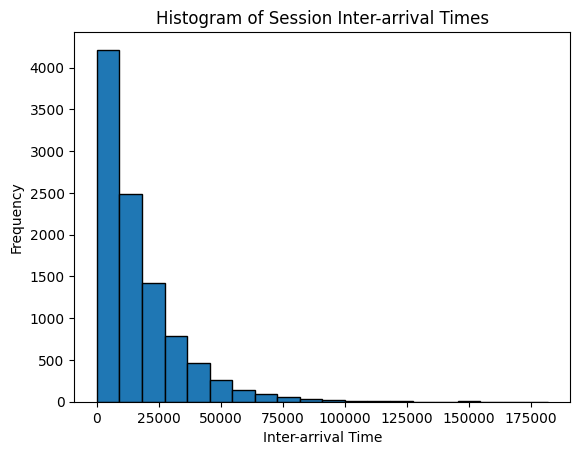

Mean : 16432.250672819187


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
file_path = 'sampling.txt'
data = np.loadtxt(file_path)

# 1. Plot the histogram of the original data
plt.hist(data, bins=20, edgecolor='black')
plt.title('Histogram of Session Inter-arrival Times')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')
plt.show()

# 2. Compute the mean of the original data
mean_interarrival_time = np.mean(data)
print(f"Mean : {mean_interarrival_time}")


2. Select 5000 random samples from original data (i.e., you should have a vector with length 5000 values). Plot its histogram and compute the mean.(sampling.txt)

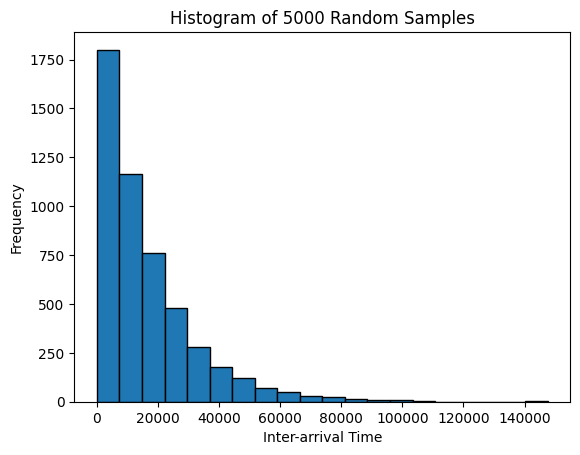

Mean of 5000 Random Samples: 16337.42178464736


In [3]:

random_samples = np.random.choice(data, size=5000, replace=False)

plt.hist(random_samples, bins=20, edgecolor='black')
plt.title('Histogram of 5000 Random Samples')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')
plt.show()

# 4. Compute the mean of the random samples
mean_random_samples = np.mean(random_samples)
print(f"Mean of 5000 Random Samples: {mean_random_samples}")


3. Select 10000 times n random elements from the data to compute the mean of these n values.(sampling.txt)

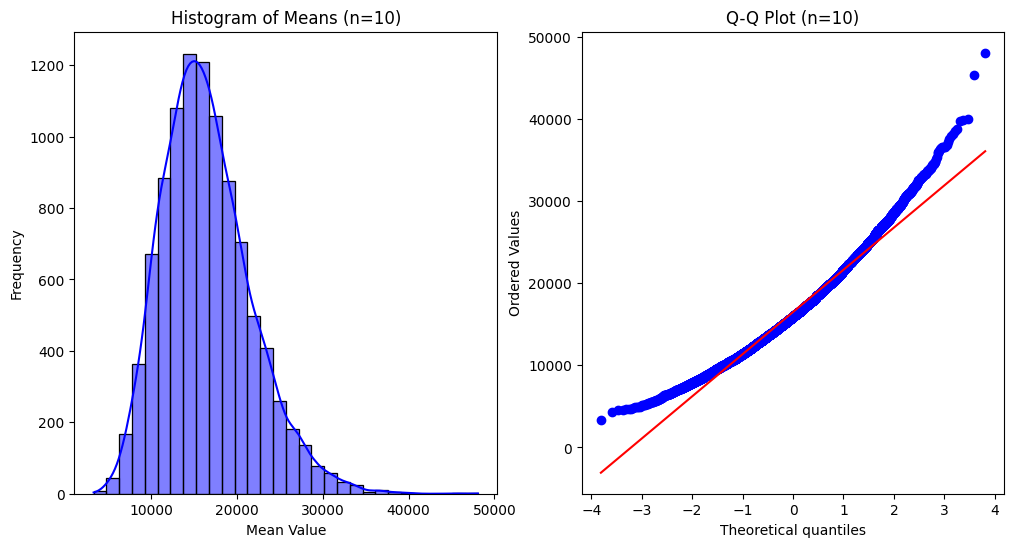


For n=10:
Mean of Means: 16495.819947307435
Standard Deviation of Means: 5199.393310872134
Sampling Error - Single Mean: 63.569274488247174
Sampling Error - Variance: 2703369.080114189



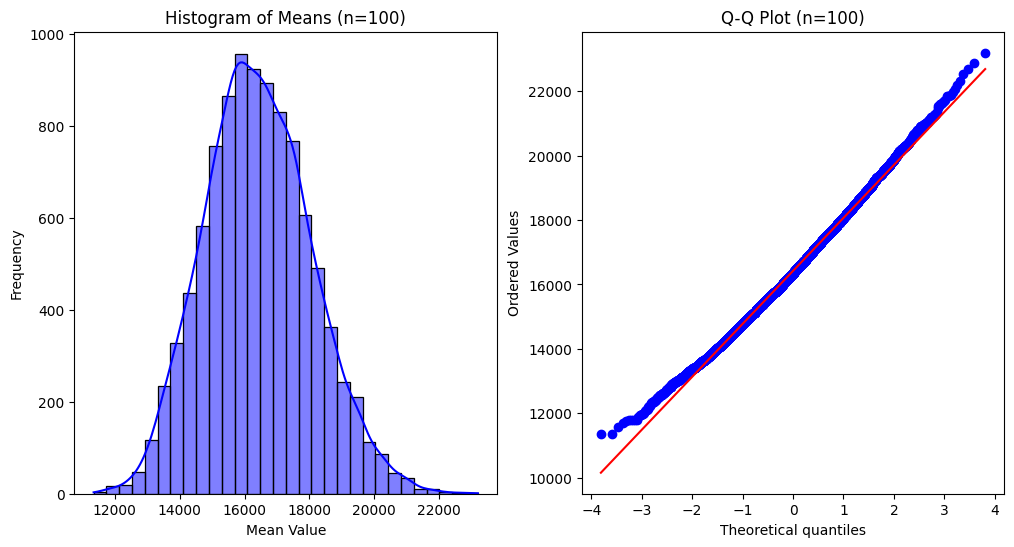


For n=100:
Mean of Means: 16422.29670472042
Standard Deviation of Means: 1646.3511020726248
Sampling Error - Single Mean: -9.95396809876911
Sampling Error - Variance: 27104.719512957465



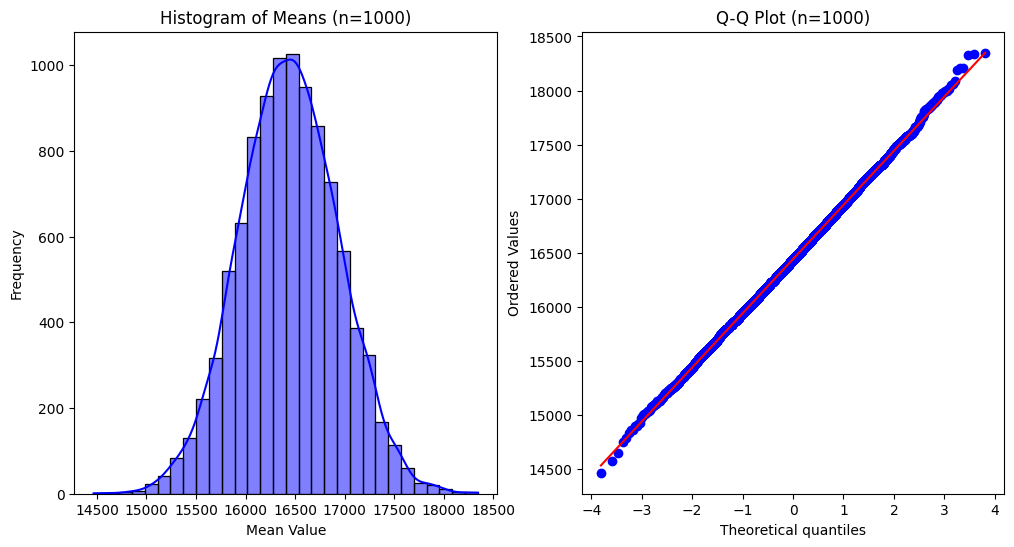


For n=1000:
Mean of Means: 16441.73491569785
Standard Deviation of Means: 500.61947290429987
Sampling Error - Single Mean: 9.484242878661462
Sampling Error - Variance: 250.61985665097902



In [4]:
import seaborn as sns
from scipy.stats import norm, probplot

# Define the scenarios
scenarios = [10, 100, 1000]

for n in scenarios:
    # Initialize an array to store the means of n random elements
    means = np.zeros(10000)

    for i in range(10000):
        # Select n random samples
        random_samples = np.random.choice(data, size=n, replace=False)
        # Compute the mean of the random samples
        means[i] = np.mean(random_samples)

    # Plot histogram of means
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(means, bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of Means (n={n})')
    plt.xlabel('Mean Value')
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(means, dist='norm', plot=plt)
    plt.title(f'Q-Q Plot (n={n})')
    plt.show()

    # Compute mean and standard deviation of means
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)

    print(f"\nFor n={n}:")
    print(f"Mean of Means: {mean_of_means}")
    print(f"Standard Deviation of Means: {std_of_means}")

    # Compute sampling error - single mean and variance
    sampling_error_mean = mean_of_means - np.mean(data)
    sampling_error_variance = (std_of_means**2) / n

    print(f"Sampling Error - Single Mean: {sampling_error_mean}")
    print(f"Sampling Error - Variance: {sampling_error_variance}\n")


1. On original data(flows.txt)

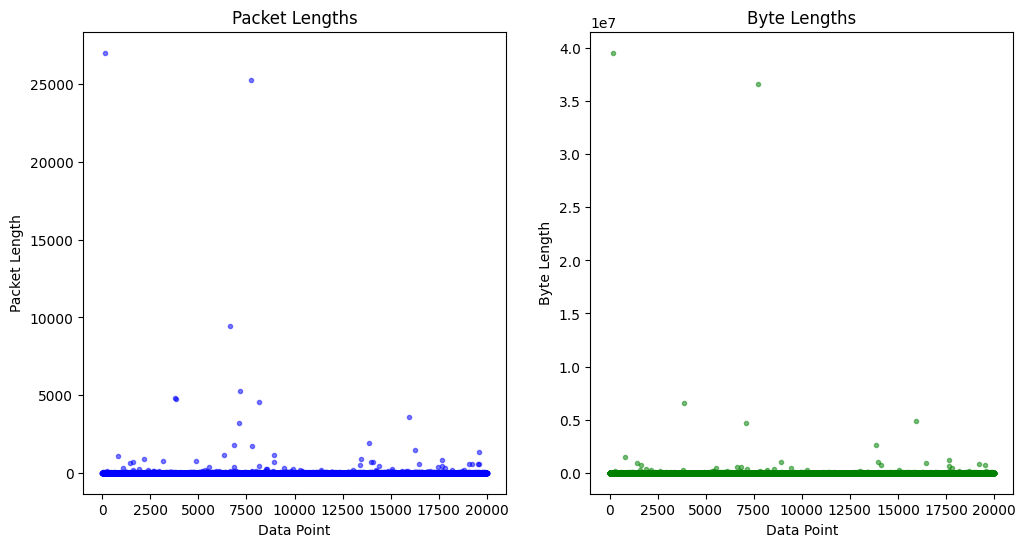

Packet Statistics:
Mean: 7.7614, Median: 1.0

Byte Statistics:
Mean: 6015.6893, Median: 40.0


In [7]:

# Load data from the file
file_path = 'flows.txt'
data_f = np.loadtxt(file_path)

# Compute mean and median for packets and bytes
mean_packets = np.mean(data_f[:, 0])
median_packets = np.median(data_f[:, 0])

mean_bytes = np.mean(data_f[:, 1])
median_bytes = np.median(data_f[:, 1])

# Plot the dataset
plt.figure(figsize=(12, 6))

# Plot for packets
plt.subplot(1, 2, 1)
plt.scatter(range(len(data_f)), data_f[:, 0], marker='.', color='blue', alpha=0.5)
plt.title('Packet Lengths')
plt.xlabel('Data Point')
plt.ylabel('Packet Length')

# Plot for bytes
plt.subplot(1, 2, 2)
plt.scatter(range(len(data_f)), data_f[:, 1], marker='.', color='green', alpha=0.5)
plt.title('Byte Lengths')
plt.xlabel('Data Point')
plt.ylabel('Byte Length')

plt.show()

# Print mean and median values
print("Packet Statistics:")
print(f"Mean: {mean_packets}, Median: {median_packets}")

print("\nByte Statistics:")
print(f"Mean: {mean_bytes}, Median: {median_bytes}")


On-line measurement(flows.txt)
Developing running_mean function & Running median function

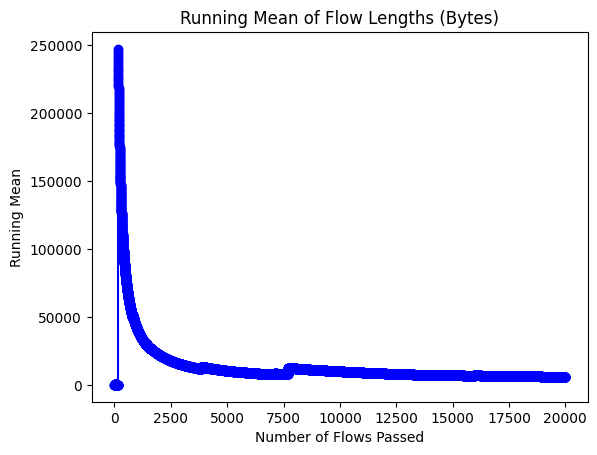

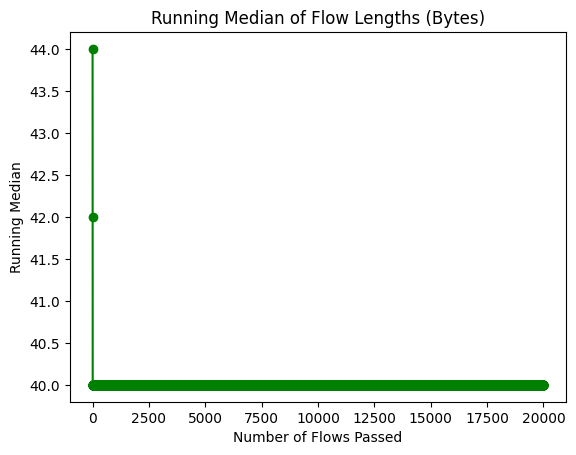

In [13]:
import numpy as np
from bisect import insort
import matplotlib.pyplot as plt

def running_mean(flow_lengths):
    mean_values = []
    cumulative_sum = 0

    for i, length in enumerate(flow_lengths, 1):
        cumulative_sum += length
        mean_values.append(cumulative_sum / i)

    return mean_values

def running_median(flow_lengths):
    median_values = []
    sorted_list = []

    for length in flow_lengths:
        insort(sorted_list, length)
        median_values.append(np.median(sorted_list))

    return median_values

data_f = np.loadtxt('flows.txt')[:, 1]

# Calculate running mean
mean_values = running_mean(data_f)

# Plot the running mean
plt.plot(range(1, len(mean_values) + 1), mean_values, marker='o', color='blue')
plt.title('Running Mean of Flow Lengths (Bytes)')
plt.xlabel('Number of Flows Passed')
plt.ylabel('Running Mean')
plt.show()

# Plot the running median
plt.plot(range(1, len(median_values) + 1), median_values, marker='o', color='green')
plt.title('Running Median of Flow Lengths (Bytes)')
plt.xlabel('Number of Flows Passed')
plt.ylabel('Running Median')
plt.show()


Task 3 

In [14]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

def preprocessing_for_ML(file_name, n_samples):

    # Read CSV file
    df = pd.read_csv('simple_flow_data.csv')
    print(df.head())

    df = df.dropna()

    df_less2000ms = df[df['duration'] < 2000].sample(n=n_samples//2, random_state=42)
    df_more2000ms = df[df['duration'] >= 2000].sample(n=n_samples//2, random_state=42)
    df = pd.concat([df_less2000ms, df_more2000ms])

    # Step 3. Encode the non-numerical values (srcip and dstip)
    encoder = LabelEncoder()
    df['srcip'] = encoder.fit_transform(df['srcip'])
    df['dstip'] = encoder.fit_transform(df['dstip'])

    # Step 4. Standardize the values (this automatically converts the dataframe to an array)
    scaler_standard = StandardScaler()
    df[['srcport', 'dstport', 'proto', 'duration']] = scaler_standard.fit_transform(df[['srcport', 'dstport', 'proto', 'duration']])

    # Step 5. Normalization (values between 0 and 1)
    scaler_normal = MinMaxScaler(feature_range=(0, 1))
    df[['srcip', 'dstip']] = scaler_normal.fit_transform(df[['srcip', 'dstip']])

    # Return the new pre-processed data set (data frame)
    df = df[['srcip', 'srcport', 'dstip', 'dstport', 'proto', 'duration']].sample(frac=1, random_state=42)
    print(df.head())
    print(df.shape)

    return df

# Call the function passing the information about "file name" and "number of samples" as arguments
df_stratified = preprocessing_for_ML("simple_flow_data.csv", 200)


             srcip  srcport           dstip  dstport  proto     duration
0  130.233.145.193  50110.0   130.233.251.6     53.0   17.0  588979108.0
1  130.233.145.193      0.0  54.250.239.227  19704.0    1.0          0.0
2   130.233.226.86  58290.0             NaN  10050.0    6.0       2391.0
3  130.233.145.193  39166.0             NaN    443.0    6.0  116039273.0
4  130.233.145.193  52148.0  130.233.227.16    111.0   17.0        520.0
         srcip   srcport     dstip   dstport     proto  duration
149   0.583333 -1.250091  0.166667  1.835505 -1.078329 -0.424643
632   0.916667 -1.166359  0.136364  0.750514 -1.078329 -0.424643
1263  0.916667 -1.166359  0.136364  2.282357 -1.078329 -0.424643
918   0.583333  0.561269  0.651515 -0.594925 -0.155892  1.514447
235   0.583333  1.200708  0.181818 -0.613996 -0.155892 -0.424541
(200, 6)
